**Dataset:** [Mrityunjay Pathak, Kaggle](https://www.kaggle.com/datasets/themrityunjaypathak/best-selling-consoles-ever)

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation

In [2]:
data = pd.read_csv('../datasets/console_sales_pathak.csv')
print(data.count())
data.describe()

index            51
console          51
North_America    32
Europe           29
Japan            34
Rest_of_World    29
Global           51
dtype: int64


,index,North_America,Europe,Japan,Rest_of_World,Global
count,51.000000,32.000000,29.000000,34.00000,29.000000,51.000000
mean,26.000000,22.370937,17.377586,9.62000,6.661379,34.497059
std,14.866069,17.691091,16.283651,10.06185,7.309025,44.858597
min,1.000000,0.400000,0.100000,0.12000,0.010000,0.010000
25%,13.500000,5.025000,4.440000,2.24250,0.900000,1.000000
50%,26.000000,20.760000,8.390000,4.97000,3.590000,10.620000
75%,38.500000,38.747500,30.150000,17.11750,10.230000,56.595000
max,51.000000,57.920000,55.280000,32.99000,26.590000,158.700000


In [3]:
data_eu = data[data['Europe'].notna()]
data_eu

,index,console,North_America,Europe,Japan,Rest_of_World,Global
0,1,PlayStation 2 (PS2),53.65,55.28,23.18,26.59,158.70
1,2,Nintendo DS (DS),57.92,51.84,32.99,11.28,154.02
2,3,Nintendo Switch (NS),42.95,30.15,27.44,18.45,118.99
3,4,Game Boy (GB),43.18,40.05,32.47,2.99,118.69
4,5,PlayStation 4 (PS4),38.20,45.92,9.59,23.33,117.04
5,6,PlayStation (PS),40.78,31.09,21.59,9.04,102.49
6,7,Nintendo Wii (Wii),45.51,33.12,12.77,10.23,101.63
7,8,PlayStation 3 (PS3),29.92,30.87,10.47,16.14,87.40
8,9,Xbox 360 (X360),47.09,25.08,1.66,11.90,85.73
9,10,Game Boy Advance (GBA),40.39,21.31,16.96,2.85,81.51


/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_43887/617885296.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_console_names, rotation=20)


[Text(0, 0, 'PlayStation 4 (PS4)'),
 Text(1, 0, 'PlayStation 3 (PS3)'),
 Text(2, 0, 'Xbox 360 (X360)'),
 Text(3, 0, 'Xbox One (XOne)'),
 Text(4, 0, 'Nintendo Wii (Wii)'),
 Text(5, 0, 'Nintendo Wii U (WiiU)')]

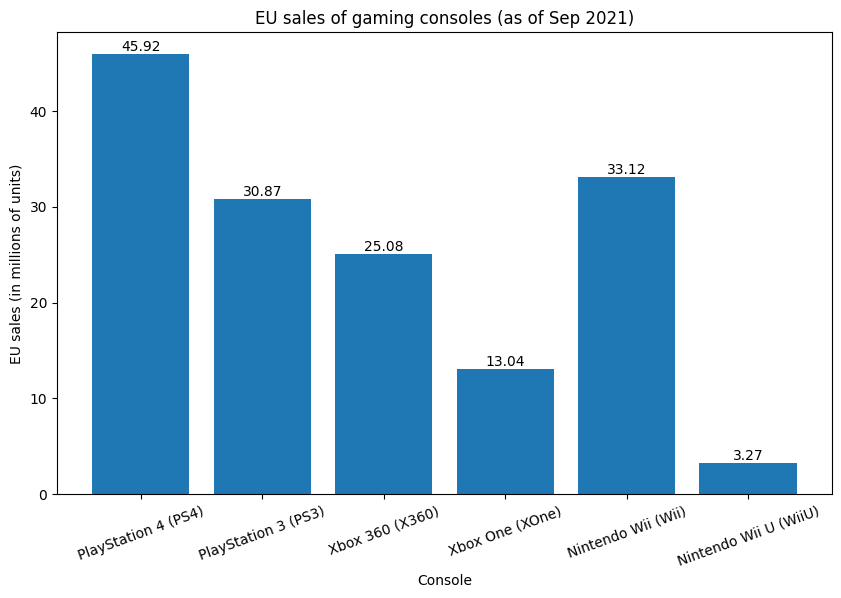

In [15]:
chosen_consoles = ['PlayStation 4 (PS4)', 'PlayStation 3 (PS3)',
                   'Xbox 360 (X360)', 'Xbox One (XOne)',
                   'Nintendo Wii (Wii)', 'Nintendo Wii U (WiiU)']
chosen_consoles_id = [4, 7, 8, 13, 6, 24]
data_console_names = [data_eu.loc[c, 'console'] for c in chosen_consoles_id]
data_eu_sales = [data_eu.loc[c, 'Europe'] for c in chosen_consoles_id]

fig, ax = plt.subplots(figsize=(10, 6))
bar_container = ax.bar(x=data_console_names,
                       height=data_eu_sales)
ax.bar_label(bar_container)
ax.set(xlabel='Console', ylabel='EU sales (in millions of units)')
ax.set(title='EU sales of gaming consoles (as of Sep 2021)')
ax.set_xticklabels(data_console_names, rotation=20)